<a href="https://colab.research.google.com/github/Malleshcr7/AI-ML-Projects/blob/main/Predicting_Wine_Quality_using_a_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction with Machine Learning

## Introduction

This notebook demonstrates how to build a binary classifier to predict wine quality using the UCI Wine Quality dataset and a Random Forest machine learning model.

**Dataset:** Red Wine Quality from UCI Machine Learning Repository

**Goal:** Classify wines as 'good' or 'not good' based on chemical properties

## Step 1: Import required libraries
We'll import basic libraries for data handling (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (scikit-learn).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Step 2: Load the dataset
We load the red wine quality dataset from a CSV file. Make sure the CSV file is in your working directory or upload it to Colab.

In [3]:
# Load and prepare data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

## Step 3: Understand the data
Let's check basic information—column names, types, missing values, and summary statistics.

In [4]:
print('Shape:', data.shape)
print('Columns:', data.columns)
data.info()
data.describe()


Shape: (1599, 12)
Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Step 4: Check for missing values
It's important to verify if any data is missing before preprocessing.

In [5]:
print('Missing values in each column:')
print(data.isnull().sum())


Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Step 5: Convert 'quality' to binary labels
We'll transform the quality column into 'good' (1) and 'not good' (0) for classification.

In [6]:
data['quality_label'] = np.where(data['quality'] >= 7, 1, 0)
data['quality_label'].value_counts()


,count
quality_label,
0,1382
1,217


## Step 6: Visualize the data
Visualizations help us understand feature distributions and correlations with quality.

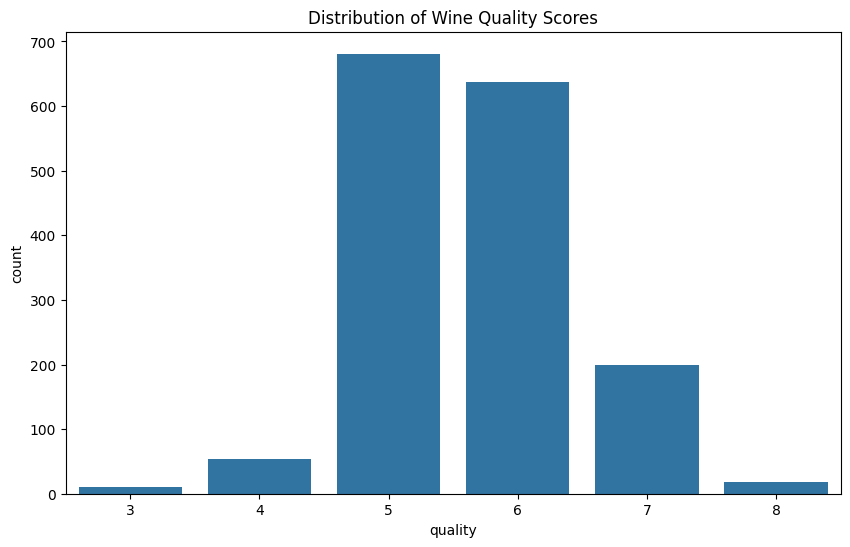

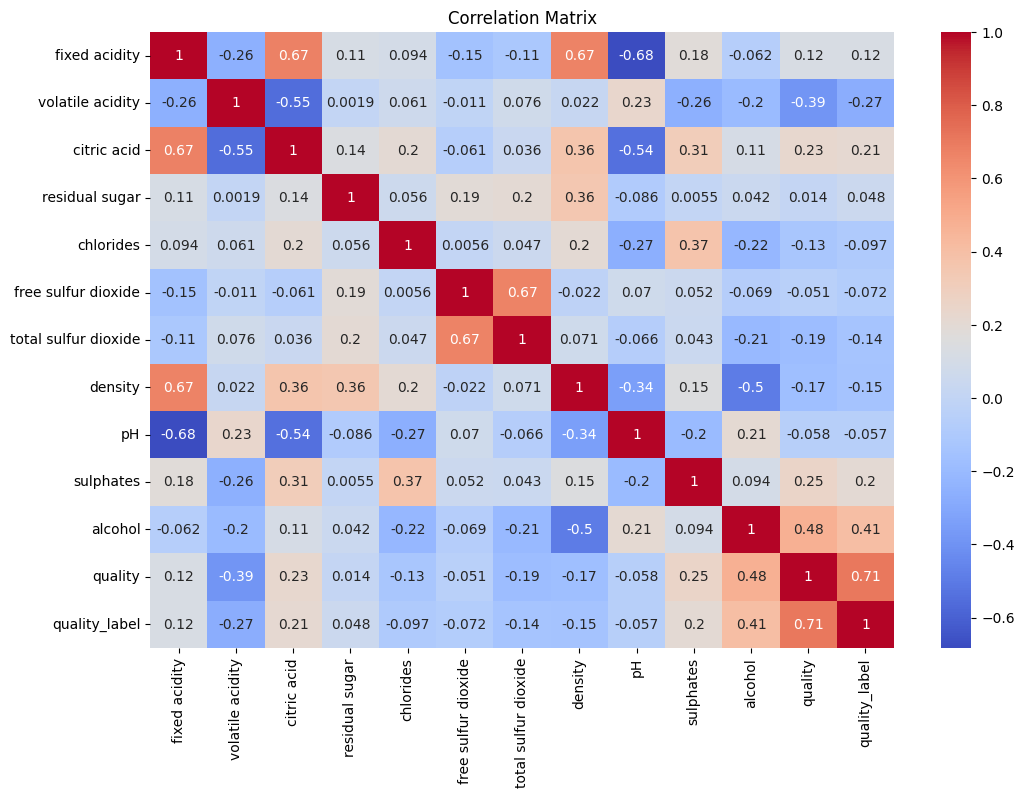

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality Scores')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Step 7: Select features and target variable
We split the data into feature variables (X) and the target label (y).

In [8]:
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']


## Step 8: Split data into training and test sets
We'll split the data to train and evaluate the model's performance.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])


Training samples: 1279
Test samples: 320


## Step 9: Build and train the Random Forest Classifier
Let's create, fit, and train our model with the training data.

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Step 10: Make predictions and evaluate accuracy
We'll predict wine quality on the test set and check accuracy.

In [11]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)


Accuracy: 0.94375


## Step 11: Display classification report and confusion matrix
This helps compare predictions to actual labels for deeper understanding.

In [12]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.93      0.63      0.75        43

    accuracy                           0.94       320
   macro avg       0.94      0.81      0.86       320
weighted avg       0.94      0.94      0.94       320

Confusion Matrix:
[[275   2]
 [ 16  27]]


## Step 12: Feature importance analysis
Let's see which chemical features most influence wine quality predictions.

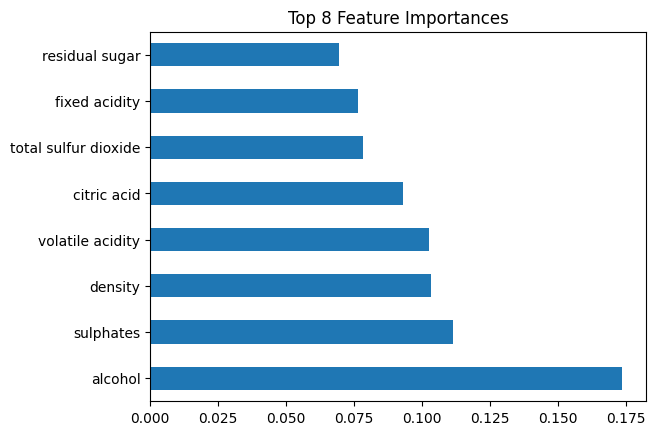

In [13]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title('Top 8 Feature Importances')
plt.show()
